In [1]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Step 2: Load Data
df = pd.read_csv('../data/train.csv')

In [3]:
# Step 3: Data Cleaning
df = df.select_dtypes(include=[np.number]).dropna(axis=1)
df = df.drop(['Id'], axis=1)

In [4]:
# Step 4: Feature Selection
correlation = df.corr()['SalePrice'].sort_values(ascending=False)
top_features = correlation.index[1:11]
df = df[top_features.tolist() + ['SalePrice']]

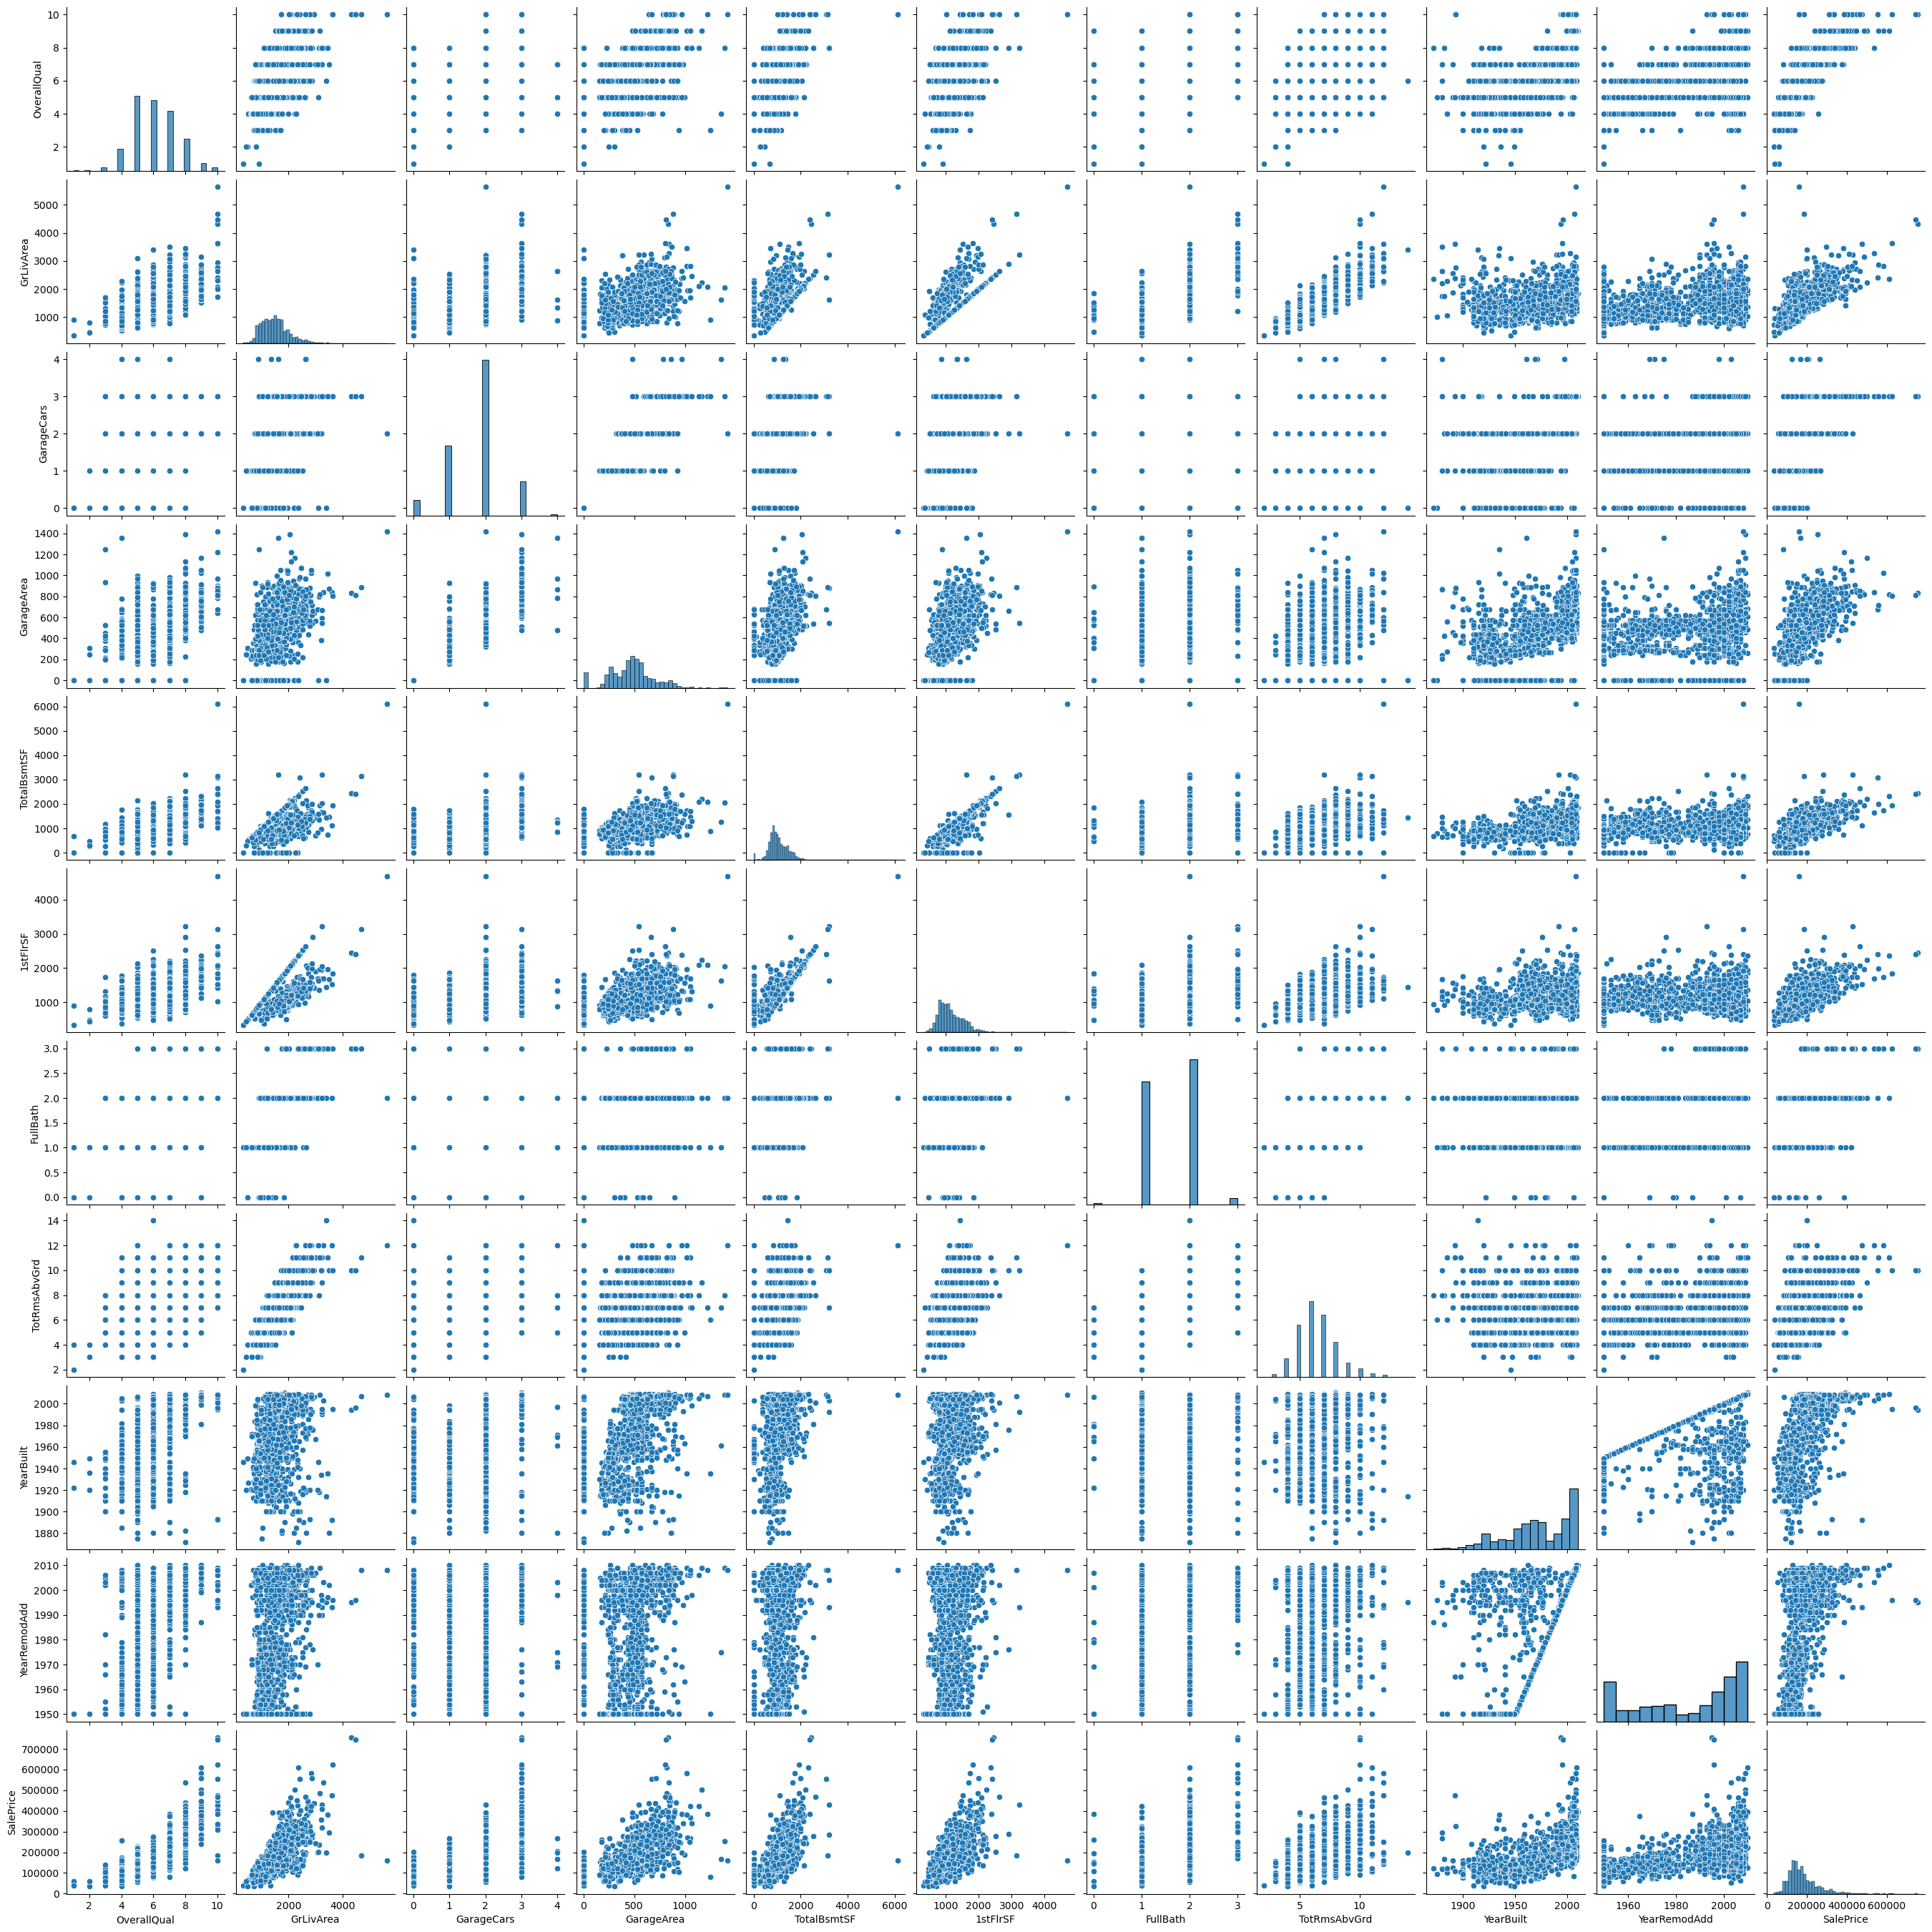

In [5]:
# Step 5: Visualization
sns.pairplot(df)
plt.show()

In [6]:
# Step 6: Train/Test Split
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 7: Model Training & Evaluation
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression R2 Score:', r2_score(y_test, y_pred_lr))

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest R2 Score:', r2_score(y_test, y_pred_rf))

Linear Regression R2 Score: 0.7968483304281089
Random Forest R2 Score: 0.8856242714556324
